In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime
import seaborn as sns

In [48]:
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.unicode_minus'] = False

### 맛집 데이터 정돈하기

#### 데이터 불러오기

In [3]:
matzip = pd.read_csv('data/matzipData.csv')
matzip.head()

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일


#### 정보확인

In [4]:
matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  400 non-null    object
 1   Rating           400 non-null    object
 2   Address          400 non-null    object
 3   Tel              350 non-null    object
 4   Food             400 non-null    object
 5   Price            397 non-null    object
 6   Parking          329 non-null    object
 7   Operating Time   364 non-null    object
 8   Holiday          126 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


#### 결측치 확인

In [5]:
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

In [6]:
# Holiday가 결측치인 데이터의 수를 구한다.
matzip['Holiday'].isna().sum()

274

In [7]:
# 휴일에 결측치가 있는 로우의 인덱스를 가져온다.
# Holiday가 결측치인 곳은 True, 아닌 곳은 False로 되어 있는 결과를 가져온다.
a1 = matzip['Holiday'].isna()

# 위에서 가져온 결과를 지정하여 결측치인 로우만 가져온다.
a2 = matzip[a1]
a2.head()

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
5,양미옥,4.3,서울시 중구 을지로3가 141-2,02-2275-8838,고기 요리,2만원-3만원,유료주차 가능,11:00 - 22:00,NaN
6,커피한약방,4.1,서울시 중구 을지로2가 101-34,070-4148-4242,카페 / 디저트,만원 미만,주차공간없음,월-금: 08:00 - 22:30 토: 11:00 - 21:00 일: 12:00 -...,NaN


### 결측치 처리

In [8]:
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

#### 휴일에 대한 결측치 처리

In [9]:
# 휴일에 결측치가 있는 로우의 인덱스를 가져온다.
# Holiday가 결측치인 곳은 True, 아닌 곳은 False로 되어 있는 결과를 가져온다.
a1 = matzip['Holiday'].isna()

# 위에서 가져온 결과를 지정하여 결측치인 로우만 가져온다.
a2 = matzip[a1]
a2.index

Int64Index([  1,   2,   3,   5,   6,   7,   8,  10,  11,  12,
            ...
            383, 385, 386, 389, 390, 391, 394, 396, 398, 399],
           dtype='int64', length=274)

In [10]:
# Holiday에 어떠한 값들이 저장되어 있는지 확인한다.
matzip['Holiday'].value_counts()

일                     75
월                     21
토, 일                   7
화                      3
수                      2
둘째/넷째 일                2
일, 첫째 월                2
일, 월                   2
월, 화                   2
첫째, 셋째 월, 둘째, 넷째 일     1
둘째, 넷째 일               1
월, 일                   1
토-일                    1
첫째/셋째 일                1
월, 마지막 화               1
넷째 일, 월                1
토                      1
격주 월                   1
월, 셋째 화                1
Name: Holiday, dtype: int64

In [11]:
# Holiday에 결측치를 '연중무휴'로 설정한다.
matzip['Holiday'] = matzip['Holiday'].fillna('연중무휴')

In [12]:
# 결측치 확인
matzip['Holiday'].isna().sum()

0

In [13]:
matzip['Holiday'].value_counts

<bound method IndexOpsMixin.value_counts of 0         일
1      연중무휴
2      연중무휴
3      연중무휴
4         일
       ... 
395       일
396    연중무휴
397       일
398    연중무휴
399    연중무휴
Name: Holiday, Length: 400, dtype: object>

#### 가격에 대한 결측치 처리

In [14]:
# 가격에 값이 어떻게 들어있는지 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [15]:
# 결측치 확인
matzip['Price'].isna().sum()

3

In [16]:
# 결측치인 값을 만원으로 채워준다.
# 결측치를 채울때는 근거가 필요하다. (지금은 연습이기 때문에 그냥 채움 ㅋ)
matzip_price = matzip['Price'].fillna('10000')
matzip_price

0       만원-2만원
1      2만원-3만원
2      3만원-4만원
3       4만원 이상
4        만원 미만
        ...   
395     만원-2만원
396     만원-2만원
397     만원-2만원
398      만원 미만
399      만원 미만
Name: Price, Length: 400, dtype: object

In [17]:
# 결측치 확인
matzip_price.isna().sum()

0

In [18]:
# 값이 어떻게 들어있는지 확인
matzip_price.value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
10000        3
Name: Price, dtype: int64

In [19]:
# 값을 변경한다.
# 만원이라는 글자를 10000으로 변경한다.
matzip_price = matzip_price.str.replace('만원','10000')

# 210000을 20000으로 변경한다.
matzip_price = matzip_price.str.replace('210000','20000')

# 310000을 30000으로 변경한다.
matzip_price = matzip_price.str.replace('310000','30000')

# 410000을 40000으로 변경한다.
matzip_price = matzip_price.str.replace('410000','40000')

# 10000-, ..를 제거한다.
matzip_price = matzip_price.str.replace('10000-','')
matzip_price = matzip_price.str.replace('20000-','')
matzip_price = matzip_price.str.replace('30000-','')

# 미만을 제거한다.
matzip_price = matzip_price.str.replace('미만','')
matzip_price = matzip_price.str.replace('이상','')

# 공백을 제거
matzip_price = matzip_price.str.strip()

matzip_price.value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [20]:
# 변환후 값의 타입을 확인한다.
matzip_price.dtype

dtype('O')

In [21]:
# 정수형으로 변환한다.
matzip_price = matzip_price.astype('int64')
matzip_price.dtype

dtype('int64')

#### 원본 데이터프레임에 넣어준다.

In [22]:
matzip['Price'] = matzip_price
matzip['Price'].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

#### 전화번호 결측치 처리

In [23]:
# 전화번호 컬럼의 저장된 값 확인
matzip['Tel'].value_counts()

02-6388-5500    2
02-2251-8383    2
02-779-2280     1
02-722-1832     1
02-722-2384     1
               ..
02-754-2600     1
02-2279-3733    1
02-2275-5580    1
02-778-9462     1
02-2277-5418    1
Name: Tel, Length: 348, dtype: int64

In [24]:
# 전화번호 결측치 확인
matzip["Tel"].isna().sum()

50

In [25]:
# 전화번호 결측치를 '번호없음'으로 채워준다.
matzip['Tel'] = matzip['Tel'].fillna('번호없음')
matzip['Tel'].isna().sum()

0

#### 평점 데이터 처리

In [26]:
# 평점에 저장되어 있는 값들을 확인한다.
matzip['Rating'].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
3.3      5
4.6      5
3.4      4
3.6      4
4.7      3
3.8      2
3.2      1
2.7      1
3.1      1
Name: Rating, dtype: int64

In [27]:
# - 는, 0.0으로 변경한다.
matzip['Rating'] = matzip['Rating'].str.replace('-','0.0')
matzip['Rating'].value_counts()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
3.3      5
4.6      5
3.6      4
3.4      4
4.7      3
3.8      2
3.2      1
2.7      1
3.1      1
Name: Rating, dtype: int64

In [28]:
# 값들의 타입을 확인한다.
matzip['Rating'].dtype

dtype('O')

In [29]:
# 실수 타입으로 변환한다.
matzip['Rating'] = matzip['Rating'].astype('float')
matzip['Rating'].dtype

dtype('float64')

In [30]:
matzip['Rating'].value_counts()

0.0    155
4.0     53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.4      4
3.6      4
4.7      3
3.8      2
3.2      1
3.1      1
2.7      1
Name: Rating, dtype: int64

#### 주차공간 데이터 처리

In [31]:
# 주차공간에 결측치를 확인한다.
matzip['Parking'].isna().sum()

71

In [32]:
# 주차공간에 저장되어 있는 것들을 확인
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
유료주차 가능 1.5시간 무료        1
유료주차 가능 1시간 무료          1
무료주차 가능 당일 무료           1
Name: Parking, dtype: int64

In [33]:
# 결측치를 '주차공간없음'으로 채워준다.
matzip['Parking'] = matzip['Parking'].fillna('주차공간없음')
matzip['Parking'].isna().sum()

0

#### 영업시간 결측치 처리

In [34]:
# 결측치 확인
matzip['Operating Time'].isna().sum()

36

In [35]:
# 저장되어 있는 값 확인
matzip['Operating Time'].value_counts()

11:00 - 22:00                                             25
11:30 - 21:30                                             15
11:30 - 22:00                                             15
00:00 - 24:00                                             12
11:00 - 23:00                                             11
                                                          ..
월-금: 11:30 - 01:00 토: 17:30 - 01:00                        1
10:30 - 24:00                                              1
월-토: 11:30 - 23:00 일: 17:30 - 23:00                        1
월-목: 11:30 - 22:00 금-토: 11:30 - 23:00 일: 11:30 - 20:00     1
월-금: 08:00 - 22:30 토: 11:00 - 21:00 일: 12:00 - 20:00       1
Name: Operating Time, Length: 204, dtype: int64

In [38]:
# 결측치에 대체할만한 값을 확인 
a1 = matzip['Operating Time'].value_counts().index
# for a2 in a1:
#     print(a2)

In [37]:
# 결측치를 00:00 - 24:00으로 채워준다.
matzip['Operating Time'] = matzip['Operating Time'].fillna('00:00 - 24:00')
matzip['Operating Time'].isna().sum()

0

### 데이터 분석

#### 가격 분포 확인
- hist와 bar의 차이

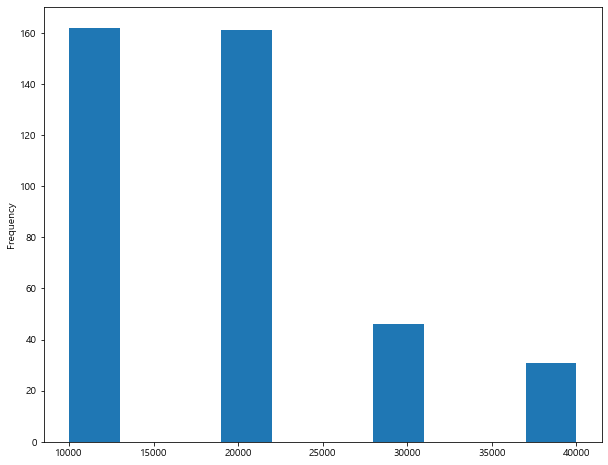

In [54]:
matzip['Price'].plot.hist()
plt.show()

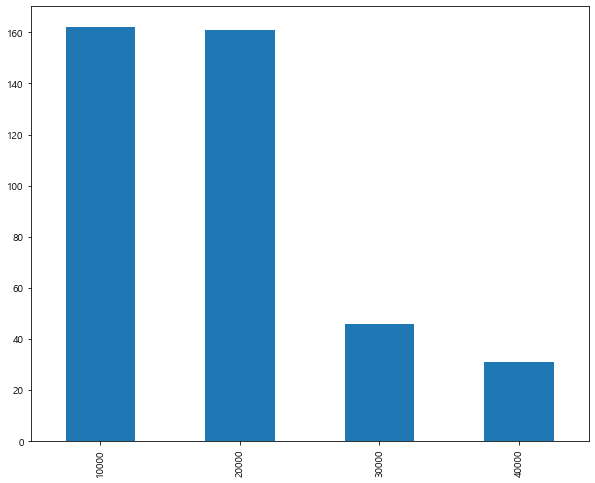

In [51]:
matzip['Price'].value_counts().plot.bar()
plt.show()

25000이하가 많고 그 이상은 수가 적다.

#### 주차 관련 분포 확인

In [46]:
# matzip['Parking'].plot.hist()
# plt.show()
# 주차 관련 정보는 숫자가 아니기때문에 오류가 발생한다.
# hist는 값의 범위를 구한다음 중간값을 기준으로 데이터의 분포를 알아본다.

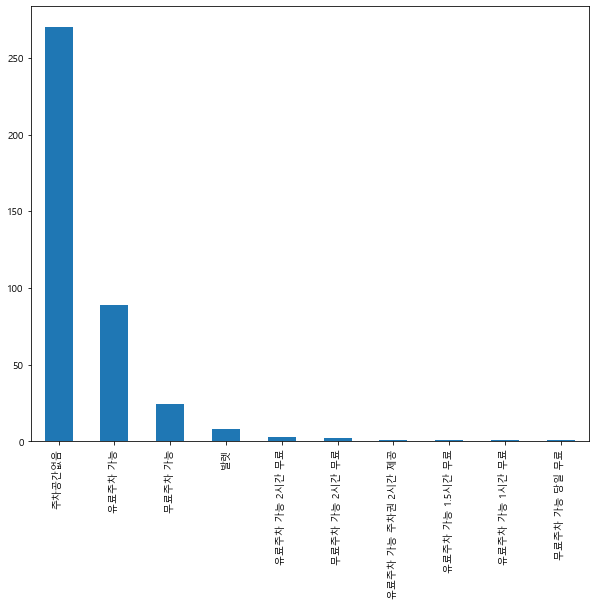

In [50]:
# 문자열 데이터는 막대 그래프로 그린다.
matzip['Parking'].value_counts().plot.bar()
plt.show()

#### 가격에 따른 별점 확인

In [55]:
# 가격에 저장되어 있는 데이터 확인
matzip['Price'].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [60]:
# 가격이 10000인 데이터 출력
matzip.query(f'Price == {10000}').head()

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,10000,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
6,커피한약방,4.1,서울시 중구 을지로2가 101-34,070-4148-4242,카페 / 디저트,10000,주차공간없음,월-금: 08:00 - 22:30 토: 11:00 - 21:00 일: 12:00 -...,연중무휴
7,혜민당,4.1,서울시 중구 을지로2가 101-43,번호없음,카페 / 디저트,10000,주차공간없음,00:00 - 24:00,연중무휴
8,도이농,4.1,서울시 중구 수표동 56-11,010-2171-4246,태국 음식,10000,주차공간없음,00:00 - 24:00,연중무휴
10,작은물,4.1,서울시 중구 을지로3가 285-1,번호없음,카페 / 디저트,10000,주차공간없음,00:00 - 24:00,연중무휴


In [61]:
# Price 컬럼에 저장되어 있는 값들을 출력한다.
a1 = matzip['Price'].value_counts().index
a1

Int64Index([10000, 20000, 30000, 40000], dtype='int64')

10000원 평균 평점 : 2.6006172839506196


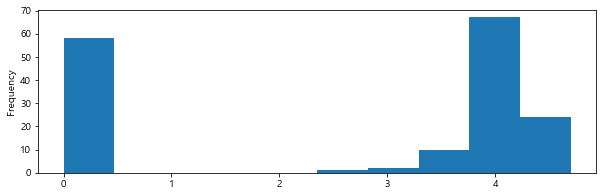

20000원 평균 평점 : 2.390683229813666


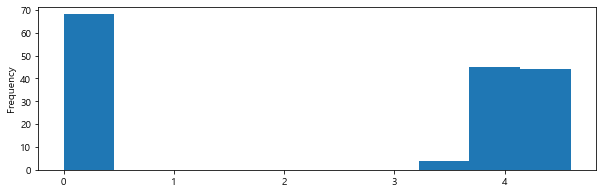

30000원 평균 평점 : 2.3434782608695652


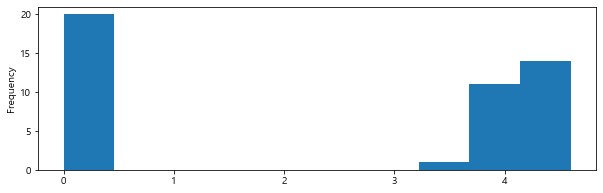

40000원 평균 평점 : 3.032258064516128


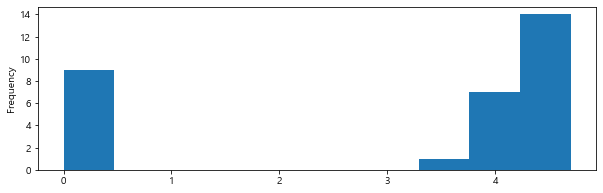

In [71]:
# 가격별 조건에 해당하는 데이터를 가져옴
for a2 in a1:
    b1 = matzip.query(f'Price == {a2}').index
    # print(b1)
    
    # 해당값에 대한 평점을 가져온다.
    rating = matzip.loc[b1]['Rating']
    # print(rating)
    
    # 평점 평균을 구한다.
    rating_avg = rating.mean()
    print(f'{a2}원 평균 평점 : {rating_avg}')
    
    rating.plot.hist(figsize=(10,3))
    plt.show()

#### Parking에 따른 평점확인

In [72]:
# Parking에 저장되어 있는 데이터 종류 확인하기
matzip['Parking'].value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
유료주차 가능 1.5시간 무료        1
유료주차 가능 1시간 무료          1
무료주차 가능 당일 무료           1
Name: Parking, dtype: int64

In [75]:
# Parking에 저장되어 있는 값 목록을 추출한다.
a3 = matzip['Parking'].value_counts().index
a3

Index(['주차공간없음', '유료주차 가능', '무료주차 가능', '발렛', '유료주차 가능 2시간 무료',
       '무료주차 가능 2시간 무료', '유료주차 가능 주차권 2시간 제공', '유료주차 가능 1.5시간 무료',
       '유료주차 가능 1시간 무료', '무료주차 가능 당일 무료'],
      dtype='object')

주차공간없음 : 2.281 점


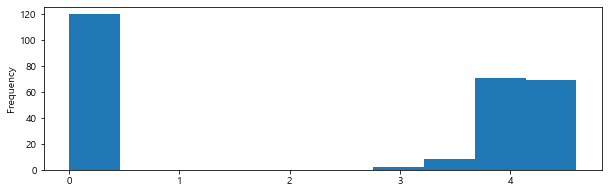

유료주차 가능 : 2.803 점


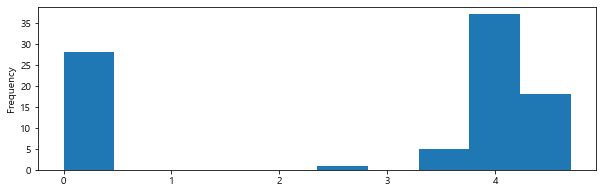

무료주차 가능 : 3.304 점


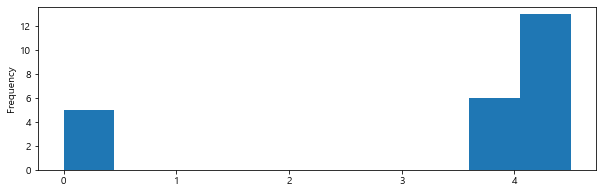

발렛 : 4.188 점


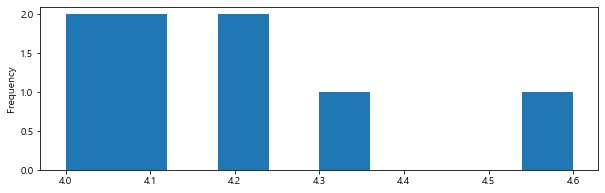

유료주차 가능 2시간 무료 : 4.067 점


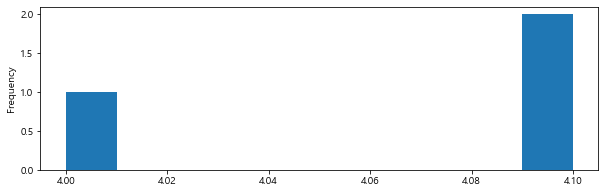

무료주차 가능 2시간 무료 : 2.35 점


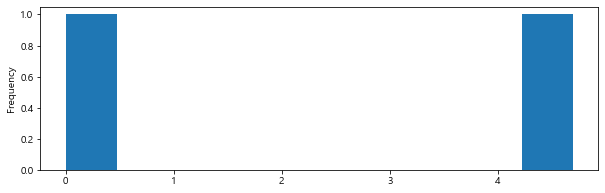

유료주차 가능 주차권 2시간 제공 : 4.1 점


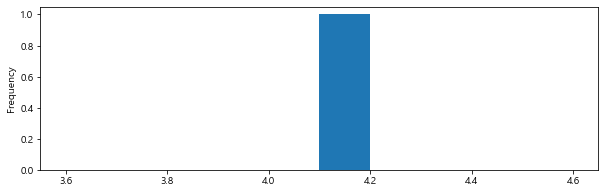

유료주차 가능 1.5시간 무료 : 4.4 점


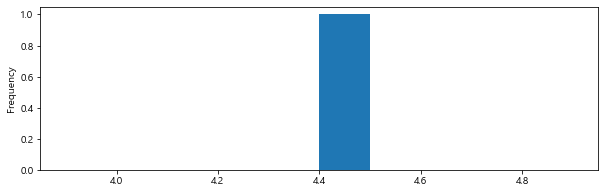

유료주차 가능 1시간 무료 : 4.4 점


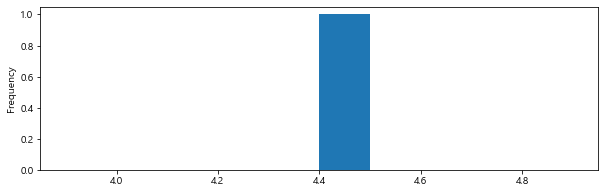

무료주차 가능 당일 무료 : 0.0 점


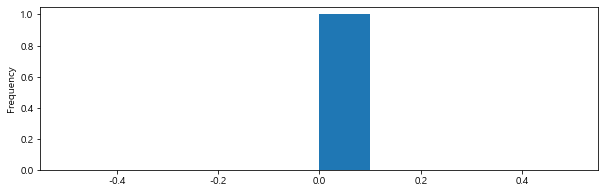

In [84]:
# Parking에 저장되어 있는 값만큼 반복
for value in a3:
    # print(value)
    # 각 값에 해당하는 로우의 인덱스를 가져온다.
    idx = matzip.query(f'Parking == "{value}"').index
    # print(idx)
    
    # 각 값 별 평점 데이터를 가져온다.
    rating = matzip.loc[idx]['Rating']
    # print(rating.mean())
    
    # 평점 평균을 구한다.
    rating_avg = rating.mean()
    print(f'{value} : {round(rating_avg,3)} 점')
    
    # 그래프로 표시
    rating.plot.hist(figsize=(10,3))
    plt.show()
    